In [1]:
import pyomo.environ as pyo

## Specify the number of queens, rows and columns

In [2]:
N = 9 # consider a NxN chess board with N-queen

## Initialize the model

In [3]:
model = pyo.ConcreteModel(name="NQueen")

## Define the sets (Rows and columns) and decision variables

x == 1 if there is a queen in row r and column c

x == 0 otherwise

In [4]:
R = list(range(1,N+1)) # row index
C = list(range(1,N+1)) # column index

model.x = pyo.Var(R, C, within=pyo.Binary)

## Define the objective function (maximize the number of queens)

In [5]:
def obj_rule(model):
    return sum(model.x[r,c] for r in R for c in C)
model.obj = pyo.Objective(rule=obj_rule, sense = pyo.maximize)

## Define the constraints

### There should be only one queen in each row

In [6]:
def one_in_row(model,r):
    return sum(model.x[r,c] for c in C) == 1
model.one_in_row = pyo.Constraint(R, rule=one_in_row)

### There should be only one queen in each column

In [7]:
def one_in_col(model,c):
    return sum(model.x[r,c] for r in R) == 1
model.one_in_col = pyo.Constraint(C, rule=one_in_col)

### There should be at most 1 queen in each forward diag (down to the right)

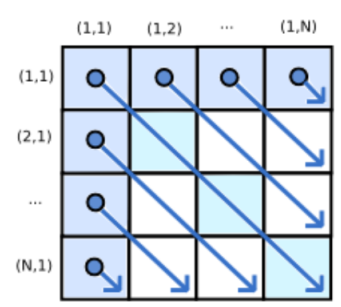

From the first row, down to the right

In [8]:
def forward_diag_top_row(model,c):
    return model.x[1,c] + sum( model.x[1+m,c+m] for m in list(range(1,N-c +1)) ) <= 1
model.forward_diag_top_row = pyo.Constraint(C, rule=forward_diag_top_row)

From the first column, down to the right

In [9]:
def forward_diag_first_col(model,r):
    return model.x[r,1] + sum( model.x[r+m,1+m] for m in list(range(1,N-r +1)) ) <= 1
model.forward_diag_first_col = pyo.Constraint(R, rule=forward_diag_first_col)

### There should be at most 1 queen in each backward diag (down to the right)

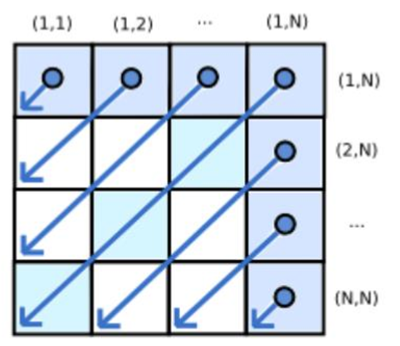

From the first row, down to the left

In [10]:
def backward_diag_top_row(model,c):
    return model.x[1,c] + sum( model.x[1+m,c-m] for m in list(range(1,c-1 +1)) ) <= 1
model.backward_diag_top_row = pyo.Constraint(C, rule=backward_diag_top_row)

From the last column, down to the left

In [11]:
def backward_diag_last_col(model,r):
    return model.x[r,N] + sum( model.x[r+m,N-m] for m in list(range(1,N-r +1)) ) <= 1
model.backward_diag_last_col = pyo.Constraint(R, rule=backward_diag_last_col)

## Solve the model

In [12]:
solver = pyo.SolverFactory("glpk")
res = solver.solve(model)

print(pyo.check_optimal_termination(res))

True


## Print the results

In [13]:
for r in R:
    for c in C:
        if pyo.value(model.x[r,c]) == 1:
            print(f"{r} , {c}")

1 , 5
2 , 3
3 , 8
4 , 6
5 , 2
6 , 9
7 , 1
8 , 4
9 , 7


In [14]:
board = []
for i in range(N):
    for j in range(N):
        if pyo.value(model.x[i+1,j+1]) == 1:
            print('X',end='|')
        else:
            print('O',end='|')
    print('')

O|O|O|O|X|O|O|O|O|
O|O|X|O|O|O|O|O|O|
O|O|O|O|O|O|O|X|O|
O|O|O|O|O|X|O|O|O|
O|X|O|O|O|O|O|O|O|
O|O|O|O|O|O|O|O|X|
X|O|O|O|O|O|O|O|O|
O|O|O|X|O|O|O|O|O|
O|O|O|O|O|O|X|O|O|
